In [ ]:
# Notebook Purpose:
#
# To explore datset columns and data distribution

In [1]:
data_url = 'https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data'

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
ttrain = pd.read_csv('train.csv')

ttrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
ttrain.shape

(1460, 81)

In [7]:
ttest = pd.read_csv('test.csv')

ttest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
ttest.shape

# we see that ttrain has extra column SalePrice
# we also see that train & test data is 50/50 split

(1459, 80)

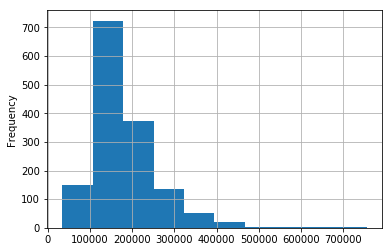

In [14]:
ttrain['SalePrice'].plot(grid=True, kind='hist')

In [15]:
ttrain.info()

# we see that columns mostly non-null with 10+ exceptions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [24]:
ttrain['SaleCondition'].value_counts().sort_values(ascending=False)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [25]:
ttrain['SaleType'].value_counts().sort_values(ascending=False)

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

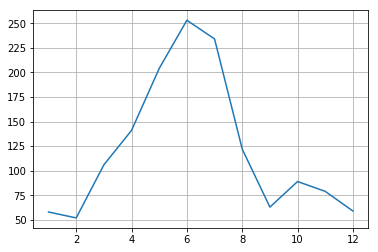

In [32]:
ttrain['MoSold'].value_counts().sort_index().plot(grid=True)

# shows that May through July are busiest for transactions

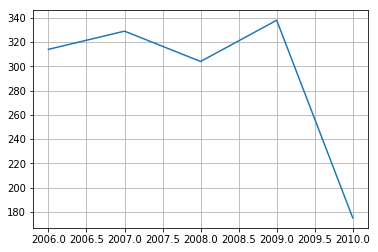

In [37]:
ttrain['YrSold'].value_counts().sort_index().plot(grid=True)

# sharp drop in 2010 transactions likely due to partial year

In [38]:
ttrain['TotRmsAbvGrd'].value_counts().sort_index()

# desc - Total rooms above grade (does not include bathrooms)

2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: TotRmsAbvGrd, dtype: int64

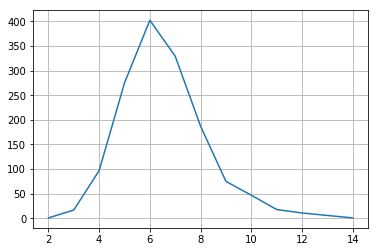

In [40]:
ttrain['TotRmsAbvGrd'].value_counts().sort_index().plot(grid=True)

# concerned that 2 above grade rooms at 0

In [42]:
ttrain['BedroomAbvGr'].value_counts().sort_index()

# Bedrooms above grade (does NOT include basement bedrooms)

0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: BedroomAbvGr, dtype: int64

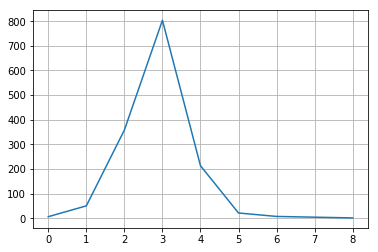

In [43]:
ttrain['BedroomAbvGr'].value_counts().sort_index().plot(grid=True)

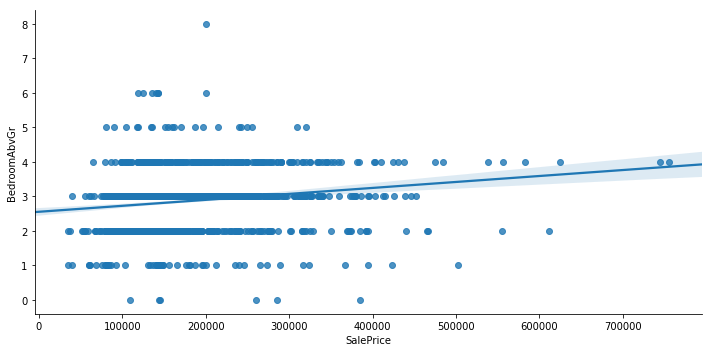

In [46]:
sns.lmplot(x='SalePrice', y='BedroomAbvGr', data=ttrain, aspect=2)

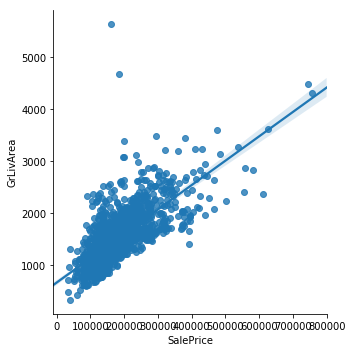

In [52]:
sns.lmplot(x='SalePrice',y='GrLivArea',data=ttrain)

# Above grade (ground) living area square feet

In [67]:
ttrain['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

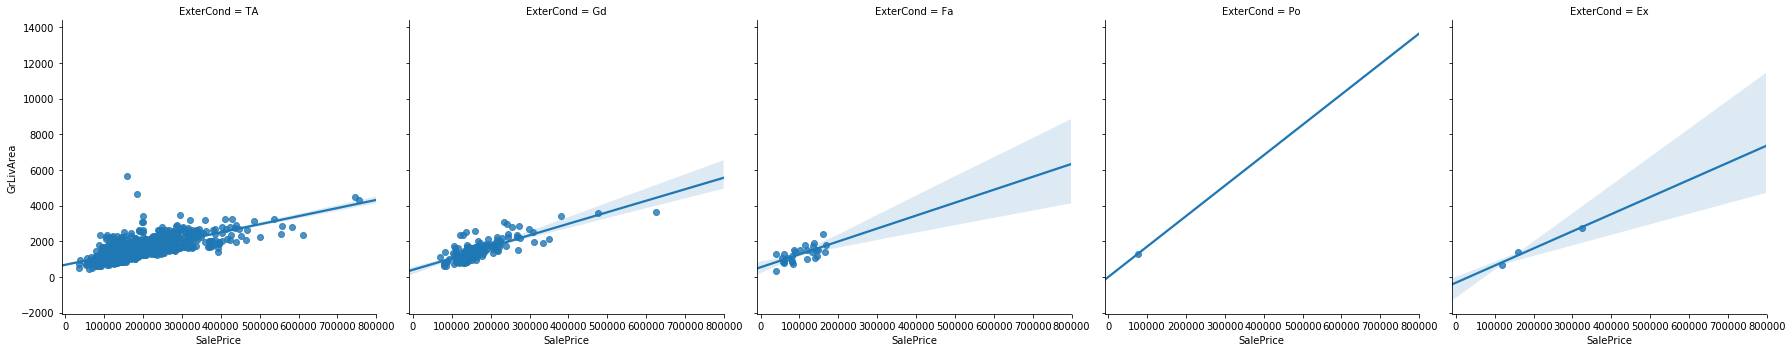

In [69]:
sns.lmplot(x='SalePrice',y='GrLivArea',data=ttrain,
           col='ExterCond')

plt.show()

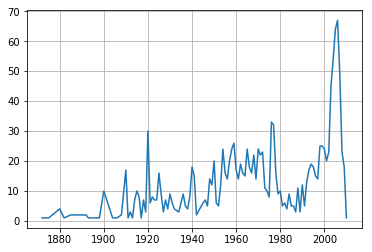

In [73]:
ttrain['YearBuilt'].value_counts().sort_index().plot(grid=True)

# we see high concentration in post-2000 built houses

In [80]:
pv_nhood = pd.pivot_table(ttrain, values='SalePrice',
               index=['Neighborhood'], aggfunc=np.mean)

pv_nhood.sort_values(by='SalePrice',
                     ascending=False,
                     inplace=True)

pv_nhood.head(10)

# neighborhood by average sale price

,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


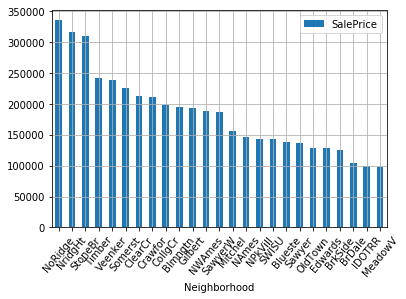

In [88]:
pv_nhood.plot(kind='bar',grid=True)

plt.xticks(rotation=50)

plt.show()

In [89]:
pv_zoning = pd.pivot_table(ttrain, values='SalePrice',
               index=['MSZoning'], aggfunc=np.mean)

pv_zoning.sort_values(by='SalePrice',
                     ascending=False,
                     inplace=True)

pv_zoning.head(10)

# zoning by average sale price

,SalePrice
MSZoning,
FV,214014.061538
RL,191004.994787
RH,131558.375000
RM,126316.830275
C (all),74528.000000


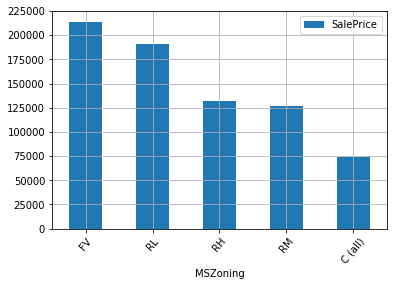

In [90]:
pv_zoning.plot(kind='bar',grid=True)

plt.xticks(rotation=50)

plt.show()

# floating village & res low density yield highest avg

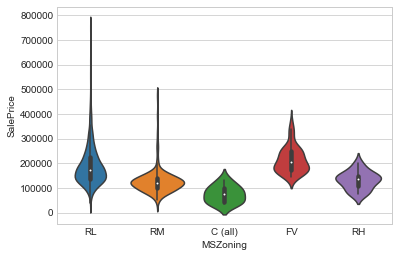

In [105]:
sns.set_style("whitegrid")

sns.violinplot(x='MSZoning',y='SalePrice',data=ttrain)

In [91]:
pv_cond = pd.pivot_table(ttrain, values='SalePrice',
               index=['Condition1'], aggfunc=np.mean)

pv_cond.sort_values(by='SalePrice',
                     ascending=False,
                     inplace=True)

pv_cond

# area conditions by average sale price

,SalePrice
Condition1,
PosA,225875.000000
PosN,215184.210526
RRNn,212400.000000
RRNe,190750.000000
Norm,184495.492063
RRAn,184396.615385
Feedr,142475.481481
RRAe,138400.000000
Artery,135091.666667


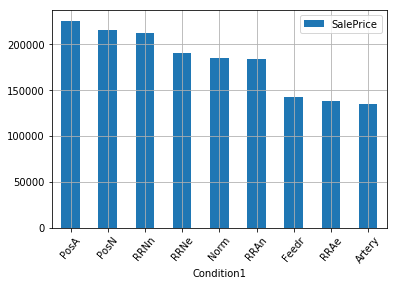

In [92]:
pv_cond.plot(kind='bar',grid=True)

plt.xticks(rotation=50)

plt.show()

# we see that being close to positive site yield highest avg
# followed by minimum distance to railroads

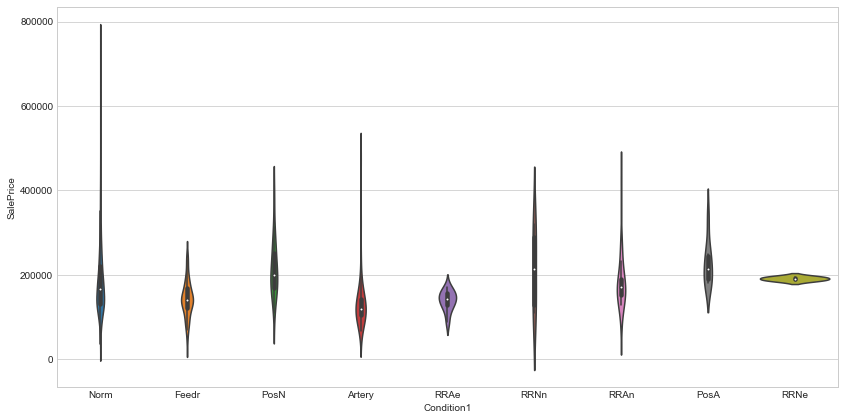

In [101]:
sns.set_style("whitegrid")

plt.figure(figsize=(14,7))

sns.violinplot(x='Condition1',y='SalePrice',data=ttrain)

# violin plot to visualize condition1 price distribution

In [102]:
ttrain['Condition2'].value_counts()

# we see only 15 datapoints have condition 2
# column is negligible

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [106]:
ttrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [107]:
# Features to be selected:
#
# MSSubClass
# MSZoning
# Neighborhood
# Condition1
# OverallQual
# YearBuilt
# TotalBsmtSF
# GrLivArea

In [ ]:
# to be continued in pt 02